In [49]:
from app.trust_evaluation.probabilistic import SingleFeatureTrustModel
import matplotlib.pyplot as mlp
import numpy as np
from app.utils.helpers import prob_transform

import random
import seaborn as sns
sns.set_theme()

## Example 1: Random bandwidth data

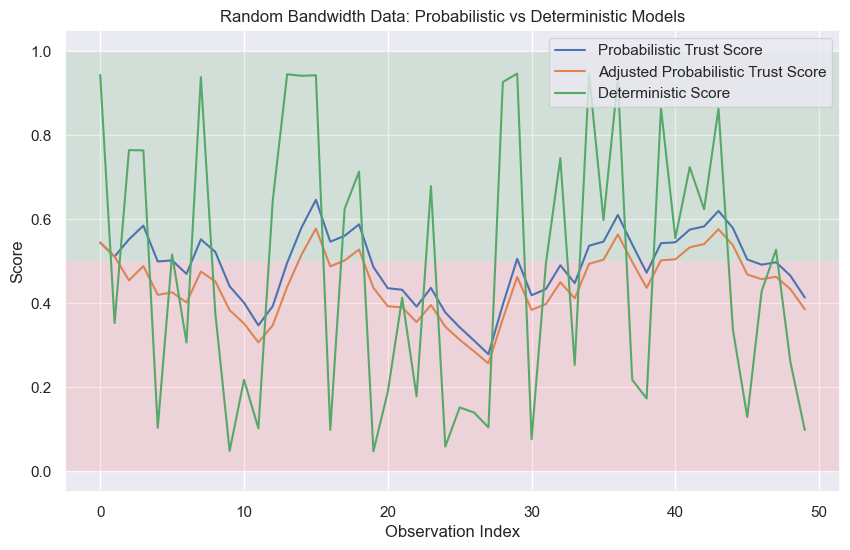

In [ ]:
# Simulate random bandwidth data (in Mbps)
data = [random.uniform(0, 100) for _ in range(50)]  # Random values between 0 and 100 Mbps
ranges = {"bandwidth": (0, 100,1),
          "latency": (0,100,-1)}  # Define realistic bandwidth range

# Initialize the probabilistic model
sftm = SingleFeatureTrustModel(name="bandwidth")

# Track scores
trust_score = []
adjusted_trust_score = []
deterministic_score = []

# Process data
for value in data:
    sftm.observe(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    deterministic_score.append(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))

# Plot results
mlp.figure(figsize=(10, 6))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(trust_score, label="Probabilistic Trust Score")
mlp.plot(adjusted_trust_score, label="Adjusted Probabilistic Trust Score")
mlp.plot(deterministic_score, label="Deterministic Score")
mlp.legend()
mlp.title("Random Bandwidth Data: Probabilistic vs Deterministic Models")
mlp.xlabel("Observation Index")
mlp.ylabel("Score")
mlp.show()

A resource with a random behaviour should not be trusted as it is uncertain. The Probabilistic Trust model takes this uncertainty into consideration

## Example 2: Consistent good bandwidth with occasional drops

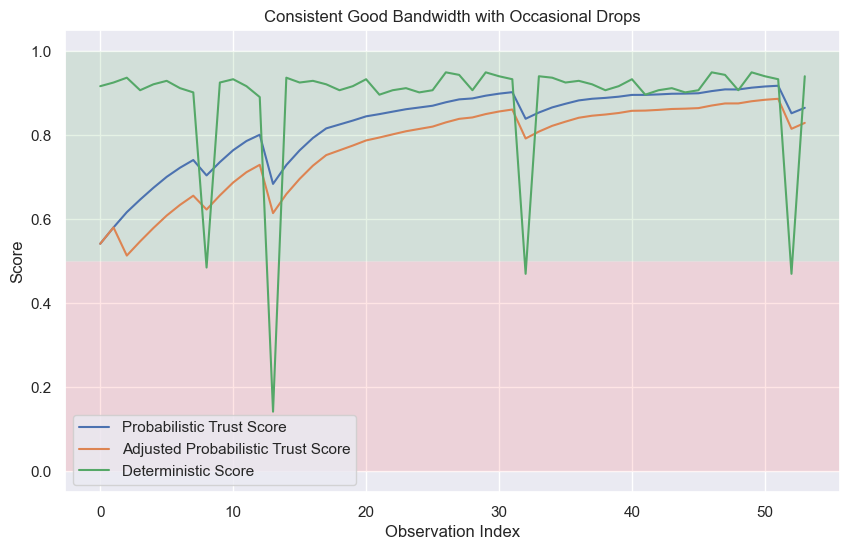

In [51]:
data = [90, 92, 95, 88, 91, 93, 89, 87, 49, 92, 94, 90, 85, 20, 95, 92, 93, 91, 88, 90, 94, 86, 88, 89, 87, 88, 99, 97, 88, 99, 96, 94, 48, 96,95, 92, 93, 91, 88, 90, 94, 86, 88, 89, 87, 88, 99, 97, 88, 99, 96, 94, 48, 96]
ranges = {"bandwidth": (0, 100)}  # Define realistic bandwidth range

sftm = SingleFeatureTrustModel(name="bandwidth")

# Track scores
trust_score = []
adjusted_trust_score = []
deterministic_score = []

# Process data
for value in data:
    sftm.observe(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    deterministic_score.append(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))

# Plot result 
mlp.figure(figsize=(10, 6))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(trust_score, label="Probabilistic Trust Score")
mlp.plot(adjusted_trust_score, label="Adjusted Probabilistic Trust Score")
mlp.plot(deterministic_score, label="Deterministic Score")
mlp.legend()
mlp.title("Consistent Good Bandwidth with Occasional Drops")
mlp.xlabel("Observation Index")
mlp.ylabel("Score")
mlp.show()

Here we can see that the probabilistic function has a smoother behaviour. It handles new stakeholders with caution but after some good results it is more confident and keeps trusting the stakeholder if it has a small drop.

## Example 3: Gradual degradation of bandwidth and Gradual increase of bandwidth

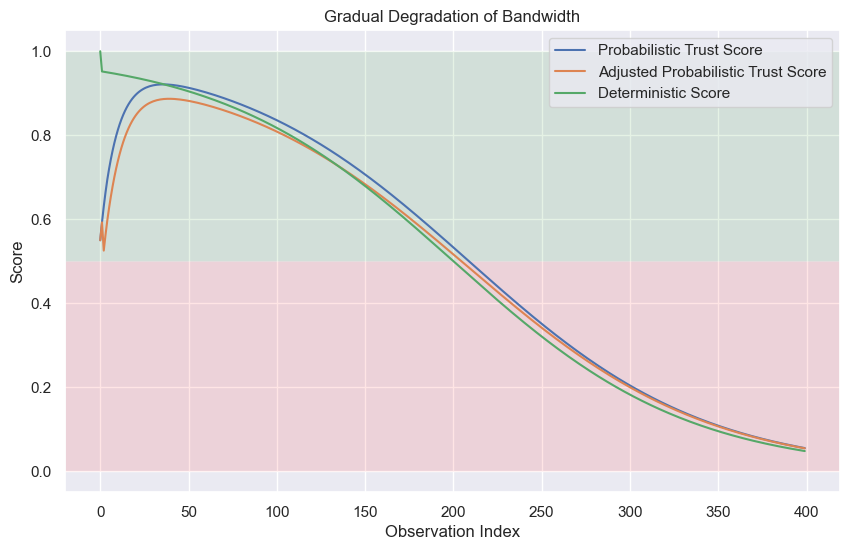

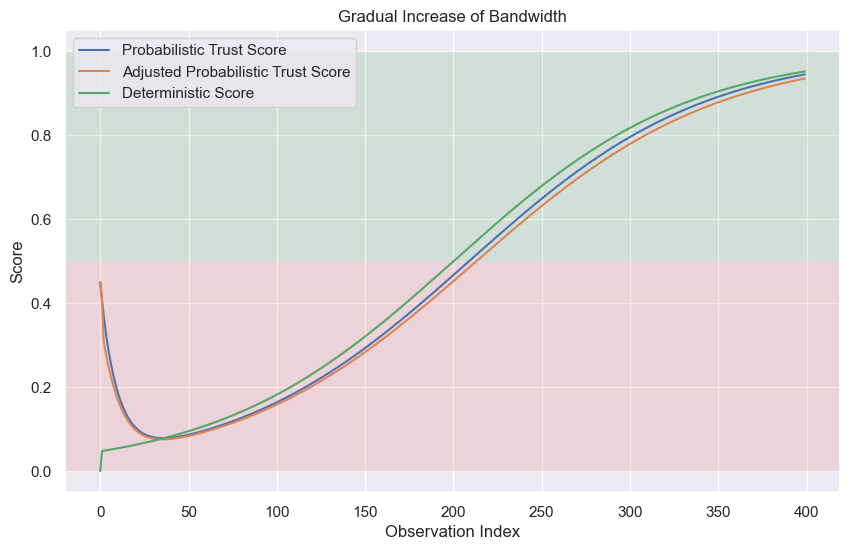

In [52]:
data = [100 - i/4 for i in range(400)]  # Gradual decrease from 100 Mbps to 50 Mbps
ranges = {"bandwidth": (0, 100)}  # Define realistic bandwidth range

sftm = SingleFeatureTrustModel(name="bandwidth")

# Track scores
trust_score = []
adjusted_trust_score = []
deterministic_score = []

# Process data
for value in data:
    sftm.observe(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    deterministic_score.append(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))

# Plot results
mlp.figure(figsize=(10, 6))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(trust_score, label="Probabilistic Trust Score")
mlp.plot(adjusted_trust_score, label="Adjusted Probabilistic Trust Score")
mlp.plot(deterministic_score, label="Deterministic Score")
mlp.legend()
mlp.title("Gradual Degradation of Bandwidth")
mlp.xlabel("Observation Index")
mlp.ylabel("Score")
mlp.show()

data = [0 + i/4 for i in range(400)]

sftm = SingleFeatureTrustModel(name="bandwidth")

# Track scores
trust_score = []
adjusted_trust_score = []
deterministic_score = []

# Process data
for value in data:
    sftm.observe(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    deterministic_score.append(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))

# Plot results
mlp.figure(figsize=(10, 6))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(trust_score, label="Probabilistic Trust Score")
mlp.plot(adjusted_trust_score, label="Adjusted Probabilistic Trust Score")
mlp.plot(deterministic_score, label="Deterministic Score")
mlp.legend()
mlp.title("Gradual Increase of Bandwidth")
mlp.xlabel("Observation Index")
mlp.ylabel("Score")
mlp.show()

We can see that in both cases the probabilistic methods's memory saves the initial trend making it slightly harder to budge than the deterministic model.

We can also see that the adjusted trust score is close to the trust score, this is due to the low volatility troughout this data

## Example 4: Real data simulation

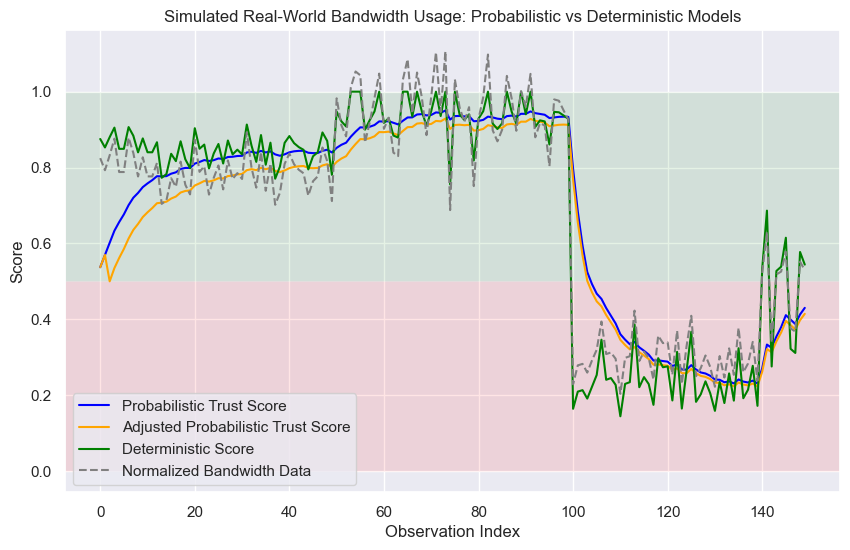

In [53]:
np.random.seed(42)

normal_operation = np.random.normal(loc=80, scale=5, size=50)  # Mean 80 Mbps, small variance

peak_usage = np.random.normal(loc=95, scale=10, size=50)  # Mean 95 Mbps, higher variance

maintenance = np.concatenate([
    np.random.normal(loc=30, scale=5, size=40),  # Mean 30 Mbps, small variance
    np.random.normal(loc=50, scale=10, size=10)  # Occasional spikes
])

data = np.concatenate([normal_operation, peak_usage, maintenance])
ranges = {"bandwidth": (0, 100)}  # Define realistic bandwidth range

sftm = SingleFeatureTrustModel(name="bandwidth")

# Track scores
trust_score = []
adjusted_trust_score = []
deterministic_score = []

# Process data
for value in data:
    sftm.observe(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    deterministic_score.append(prob_transform(ranges['bandwidth'][0],ranges['bandwidth'][1], value))

# Plot results
mlp.figure(figsize=(10, 6))
mlp.axhspan(0.5, 1, facecolor='green', alpha=0.1) 
mlp.axhspan(0, 0.5, facecolor='red', alpha=0.1) 
mlp.plot(trust_score, label="Probabilistic Trust Score", color="blue")
mlp.plot(adjusted_trust_score, label="Adjusted Probabilistic Trust Score", color="orange")
mlp.plot(deterministic_score, label="Deterministic Score", color="green")
mlp.plot(data / 100, label="Normalized Bandwidth Data", color="gray", linestyle="dashed")
mlp.legend()
mlp.title("Simulated Real-World Bandwidth Usage: Probabilistic vs Deterministic Models")
mlp.xlabel("Observation Index")
mlp.ylabel("Score")
mlp.show()